# Training xgb models

In [184]:
#XGBoost prediction script
#importing modules

import numpy as np
import pandas as pd
#import xgboost as xgb
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette('muted')
sns.set(style="whitegrid")

Setting up the environment.

In [144]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.shape, test.shape

((1460, 81), (1459, 80))

In [12]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [145]:
from sklearn.cross_validation import KFold

X = train.iloc[:,:-1]
y = train.iloc[:,-1]

eval_size = 0.1
kf = KFold(len(train), round(1./eval_size))
train_indices, valid_indices = next(iter(kf))
X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
X_valid, y_valid = X.iloc[valid_indices], y.iloc[valid_indices]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1314, 80), (1314,), (146, 80), (146,))

# Data visualization

## Target variable

In [54]:
X.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


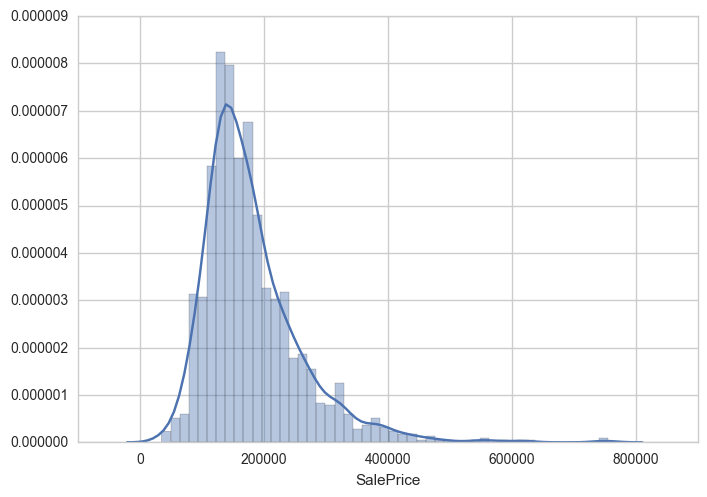

In [19]:
sns.distplot(train.SalePrice)

In [35]:
for i in [c for c in train.columns[1:-1] if train[c].dtype == 'int64']:
    sns.distplot(train[i])

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [146]:
num_features = [c for c in train.columns if train[c].dtype == ('int64' or 'float64')]
cat_features = [c for c in train.columns if train[c].dtype == 'object']
len(train.columns) == len(num_features+cat_features)

False

We can see that not all features are being accounted by our two categories. Probably because of a conflict between NaN values and dtype of the columns. Let's see which features are being excluded.

In [147]:
excl_features = [c for c in train.columns if c not in (num_features + cat_features)]
train[excl_features].head()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [148]:
train[excl_features].isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

It seems that we will need to impute those NaN values, so that we can treat these features as int or float. What would be the best method for imputation? Let's take a look at the distributions:

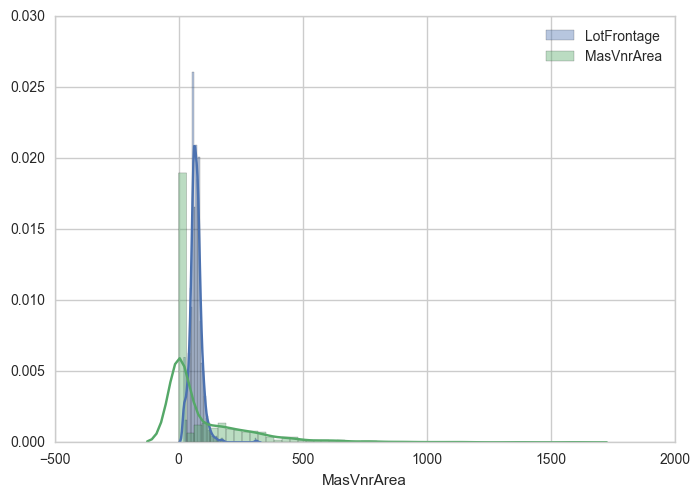

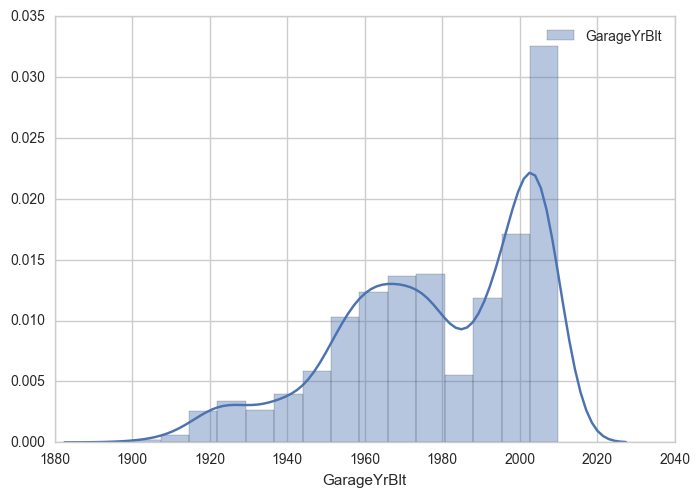

In [122]:
sns.distplot(train.LotFrontage.dropna(), label='LotFrontage')
sns.distplot(train.MasVnrArea.dropna(), label='MasVnrArea')
plt.legend()
plt.show()
sns.distplot(train.GarageYrBlt.dropna(), label='GarageYrBlt')
plt.legend()

For LotFrontage and MasVnrArea we could use the median to fill in the NaN.
(For GarageYrBlt we could try using 0 so that we know that these samples did not have a valid year to begin with.) --> Will also first use median for GarageYrBlt

In [149]:
from sklearn.preprocessing import Imputer

def process_X_data(X_train):
    imputer = Imputer(missing_values='NaN', strategy='median')
    X_train[excl_features] = imputer.fit_transform(X_train[excl_features])

process_X_data(X_valid)

C:\Users\arcosdid\Continuum\Anaconda3\envs\datasci\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\arcosdid\Continuum\Anaconda3\envs\datasci\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [151]:
X_train[excl_features].dtypes

LotFrontage    float64
MasVnrArea     float64
GarageYrBlt    float64
dtype: object

In [152]:
num_features += excl_features

Now we have divided all features between numeric and categorical:

In [153]:
len(train.columns) == len(num_features+cat_features)

True

In [ ]:
#delete

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

lbl_enc = LabelEncoder()
lbl_enc.fit(X_train[cat_features])
X_train[cat_features] = lbl_enc.transform(X_train[cat_features])

ohe = OneHotEncoder()
ohe.fit(X_train[cat_features])
X_train[cat_features] = ohe.transform(X_train[cat_features])

In [154]:
X_train[cat_features] = X_train[cat_features].apply(lambda x: x.astype('category'))

C:\Users\arcosdid\Continuum\Anaconda3\envs\datasci\lib\site-packages\pandas\core\frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [155]:
X_train = pd.get_dummies(X_train, dummy_na=True, drop_first=True)
X_train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleType_nan',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan'],
      dtype='object', length=288)

In [171]:
num_features = num_features[:-4]+num_features[-3:]
#X_train[num_features].columns

In [185]:
imputer = Imputer(strategy='median')
imputer.fit_transform(X_train)

array([[  1.47000000e+02,   3.00000000e+01,   5.10000000e+01, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.48000000e+02,   6.00000000e+01,   6.90000000e+01, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.49000000e+02,   2.00000000e+01,   6.30000000e+01, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.45800000e+03,   7.00000000e+01,   6.60000000e+01, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.45900000e+03,   2.00000000e+01,   6.80000000e+01, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.46000000e+03,   2.00000000e+01,   7.50000000e+01, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [186]:
from sklearn.ensemble import ExtraTreesRegressor

# trees regressor
print('Training')
t0 = time.time()
rfr = ExtraTreesRegressor(n_estimators=100, max_depth=4, n_jobs=-1, random_state=42,
                          verbose=0)
model = rfr.fit(imputer.fit_transform(X_train), y_train)
print("Done: %.1fs" % (time.time() - t0))

Training


Done: 0.6s


In [187]:
imp = pd.DataFrame(index=X_train.columns.values)
imp['train'] = pd.Series(model.feature_importances_, index=X_train.columns.values)
imp.sort_values(by='train', ascending=True)[-20:].plot.barh()
plt.title('Feature importance from ExtraTreesRegressor using all raw features')

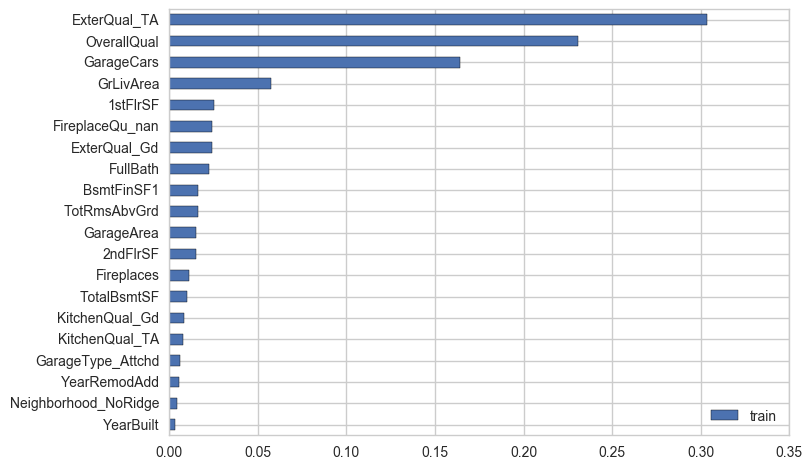

In [203]:
imp.sort_values(by='train', ascending=True)[-20:].plot.barh()
#plt.title('Feature importance from ExtraTreesRegressor using all raw features')

In [216]:
X_valid[cat_features] = X_valid[cat_features].apply(lambda x: x.astype('category'))
X_valid = pd.get_dummies(X_valid, dummy_na=True, drop_first=True)
X_valid.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_New', 'SaleType_WD', 'SaleType_nan',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan'],
      dtype='object', length=230)

In [ ]:
class DummyEncoder(TransformerMixin):

    def fit(self, X, y=None):
        # record info here, use in transform, inverse_transform
        self.columns_ = X.columns
        self.cat_cols_ = X.select_dtypes(include=['category']).columns
        self.non_cat_cols_ = X.columns.drop(self.cat_cols_)
        self.cat_map_ = {col: X[col].cat for col in self.cat_cols_}
        left = len(self.non_cat_cols_)
        return self

    def transform(self, X, y=None):
        return np.asarray(pd.get_dummies(X))

    def inverse_transform(self, trn, y=None):
        # numpy to pandas dataframe
        # original column names <-> positions
        numeric = pd.DataFrame(trn[:, :len(self.non_cat_cols_)],
                               columns=self.non_cat_cols_)
        pass

de = DummyEncoder()
trn = de.fit_transform()
trn

In [130]:
import pickle

pickle.dump(clf, 'filename.pkl')

In [4]:
# Model training routine ###########################################################################################################################################################

# Univariate linear models, first layer <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

features_ulm = ['technical_20', 'technical_19', 'technical_27', 'technical_21', 'technical_30', 'technical_2', 'technical_36', 'technical_40', 'technical_17']

features_ulm_train = train.loc[y_is_within_cut, features_ulm]
feature_ulm_names = features_ulm_train.columns
X_ulm = features_ulm_train.values

# Train dataset
xglin_train = xgb.DMatrix(X_ulm, label=y_train, feature_names=feature_ulm_names)

# Number of training rounds
num_rounds = 100

# XGb model params
params_xglin = {'booster'         :'gblinear',
                'objective'       :'reg:linear',
                'eta'             : 0.1,
                'max_depth'       : 4,
                'subsample'       : 0.9,
                'min_child_weight': 1000,
                'seed'            : 42,
                'base_score'      : 0
                }

print ("Training linear models")
t0 = time()
bslin = xgb.train(params_xglin, xglin_train, num_rounds)
print("Done: %.1fs" % (time() - t0))

# Boosted trees ensemble, first layer <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# https://www.kaggle.com/fernandocanteruccio/two-sigma-financial-modeling/xgboost-feature-importance-analysis
features_bt = ['technical_20', 'technical_19', 'technical_27', 'technical_21', 'technical_30', 'technical_2', 'technical_36', 'technical_40', 'technical_17'
              'fundamental_53', 'fundamental_35', 'fundamental_36', 'fundamental_11', 'fundamental_18', 'fundamental_30', 'fundamental_50', 'fundamental_34']

features_bt_train = train.loc[y_is_within_cut, features_bt]
feature_bt_names = features_bt_train.columns
X_bt = features_bt_train.values

# Train dataset
xgtrees_train = xgb.DMatrix(X_bt, label=y_train, feature_names=feature_bt_names)

# XGb model params
params_xgtrees = {'objective'       :'reg:linear',
                  'eta'             : 0.1,
                  'max_depth'       : 4,
                  'subsample'       : 0.9,
                  'min_child_weight': 1000,
                  'seed'            : 42,
                  'base_score'      : 0
                   }

print ("Training boosted trees")
t0 = time()
bst = xgb.train(params_xgtrees, xgtrees_train, num_rounds)
print("Done: %.1fs" % (time() - t0))

Training linear models


Done: 24.0s


Training boosted trees


Done: 214.0s


For this simple exploration model, the final ensemble prediction is just the unweighted mean of the first layer models predictions.

In [5]:
# Predict-step-predict routine ####################################################################################################################################################
def gen_predictions(update_threshold, print_info=True):
    
    global bslin, bst
    
    env = kagglegym.make()

    # We get our initial observation by calling "reset"
    o = env.reset()

    train = o.train

    params_xglin.update({'process_type': 'update',
                         'updater'     : 'refresh',
                         'refresh_leaf': False})

    params_xgtrees.update({'process_type': 'update',
                           'updater'     : 'refresh',
                           'refresh_leaf': False})

    # init aux vars
    reward = 0.0
    reward_log = []
    timestamps_log = []
    pos_count = 0
    neg_count = 0

    total_pos = []
    total_neg = []

    print("Predicting")
    t0= time()
    while True:
    #    o.features.fillna(mean_values, inplace=True)

        # Predict with univariate linear models
        features_ulm_pred = o.features.loc[:,features_ulm].values
        X_ulm_pred = xgb.DMatrix(features_ulm_pred, feature_names=feature_ulm_names)

        y_ulm_pred = bslin.predict(X_ulm_pred).clip(low_y_cut, high_y_cut)

        # Predict with boosted trees
        features_bt_pred = o.features.loc[:,features_bt].values
        X_bt_pred = xgb.DMatrix(features_bt_pred, feature_names=feature_bt_names)

        y_bt_pred = bst.predict(X_bt_pred).clip(low_y_cut, high_y_cut)

        # Average the predictions
        averaged_pred = np.mean(np.vstack((y_ulm_pred, y_bt_pred)), axis=0)

        # Fill target df with predictions 
        o.target.y = averaged_pred

        o.target.fillna(0, inplace=True) # alternative could try median of id's 'y'
        pred = o.target
        timestamp = o.features["timestamp"][0]
        obs_old = o
        o, reward, done, info = env.step(pred)

        if update_threshold is not None:
            if (reward > update_threshold):
                # update boosted trees model
                xgtrees_update = xgb.DMatrix(obs_old.features.loc[:,features_bt].values, averaged_pred, feature_names=feature_bt_names)

                bst = xgb.train(params_xgtrees, xgtrees_update, num_rounds, xgb_model=bst)

                # update boosted linear model 
                xglin_update = xgb.DMatrix(obs_old.features.loc[:,features_ulm].values, averaged_pred, feature_names=feature_ulm_names)

                bslin = xgb.train(params_xglin, xglin_update, num_rounds, xgb_model=bslin)

        
        timestamps_log.append(timestamp)
        reward_log.append(reward)

        if (reward < 0):
            neg_count += 1
        else:
            pos_count += 1

        total_pos.append(pos_count)
        total_neg.append(neg_count)
        
        if timestamp % 100 == 0:
            if print_info:
                print("Timestamp #{}".format(timestamp))
                print("Step reward:", reward)
                print("Mean reward:", np.mean(reward_log[-timestamp:]))
                print("Positive rewards count: {0}, Negative rewards count: {1}".format(pos_count, neg_count))
                print("Positive reward %:", pos_count / (pos_count + neg_count) * 100)

            pos_count = 0
            neg_count = 0

        if done:
            break
    print("Done: %.1fs" % (time() - t0))
    print("Total reward sum:", np.sum(reward_log))
    print("Final reward mean:", np.mean(reward_log))
    print("Total positive rewards count: {0}, Total negative rewards count: {1}".format(np.sum(total_pos), np.sum(total_neg)))
    print("Final positive reward %:", np.sum(total_pos) / (np.sum(total_pos) + np.sum(total_neg)) * 100)
    print(info)

    return reward_log, timestamps_log, info['public_score']

reward_log, timestamps_log, score = gen_predictions(None)

Predicting


Timestamp #1000
Step reward: 0.0682824142877
Mean reward: -0.130670773233
Positive rewards count: 8, Negative rewards count: 87
Positive reward %: 8.421052631578947


Timestamp #1100
Step reward: 0.018916958972
Mean reward: -0.118074132355
Positive rewards count: 19, Negative rewards count: 81
Positive reward %: 19.0


Timestamp #1200
Step reward: -0.0940340947079
Mean reward: -0.117326601038
Positive rewards count: 15, Negative rewards count: 85
Positive reward %: 15.0


Timestamp #1300
Step reward: -0.10176397287
Mean reward: -0.119343992201
Positive rewards count: 10, Negative rewards count: 90
Positive reward %: 10.0


Timestamp #1400
Step reward: -0.161153159325
Mean reward: -0.120495822697
Positive rewards count: 12, Negative rewards count: 88
Positive reward %: 12.0


Timestamp #1500
Step reward: -0.15728746278
Mean reward: -0.119924357479
Positive rewards count: 15, Negative rewards count: 85
Positive reward %: 15.0


Timestamp #1600
Step reward: -0.151259487826
Mean reward: -0.124518195828
Positive rewards count: 20, Negative rewards count: 80
Positive reward %: 20.0


Timestamp #1700
Step reward: 0.0132193473545
Mean reward: -0.127859444595
Positive rewards count: 12, Negative rewards count: 88
Positive reward %: 12.0


Timestamp #1800
Step reward: -0.123880727074
Mean reward: -0.127351704346
Positive rewards count: 17, Negative rewards count: 83
Positive reward %: 17.0


Done: 172.2s
Total reward sum: -115.660619915
Final reward mean: -0.127519977856
Total positive rewards count: 6763, Total negative rewards count: 38275
Final positive reward %: 15.016208535
{'public_score': 0.015839125200947671}


With the model predictions in hands, lets plot some rewards distributions.

In [6]:
rows_list = []

def add_to_log(reward_log_i, score_i, update_threshold_i, rows_list_i):
    dicti = {}
    dicti.update({'score':score_i, 'num_rounds': num_rounds, 'params_xglin': params_xglin, 
              'params_xgtrees': params_xgtrees, 'reward_log':reward_log_i, 
              'update_threshold':update_threshold_i})
    rows_list_i.append(dicti)
    results_log = pd.DataFrame(rows_list_i)
    return results_log

#results_log.to_csv('log_2.csv')
results_log = add_to_log(reward_log, score, None, rows_list)
results_log.to_csv('log_4.csv')
results_log

,num_rounds,params_xglin,params_xgtrees,reward_log,score,update_threshold
0,100,"{'booster': 'gblinear', 'objective': 'reg:line...","{'objective': 'reg:linear', 'eta': 0.1, 'max_d...","[-0.201233990548, -0.0442993579161, -0.1051320...",0.015839,None


In [ ]:
ls

Rewards count: (907,)


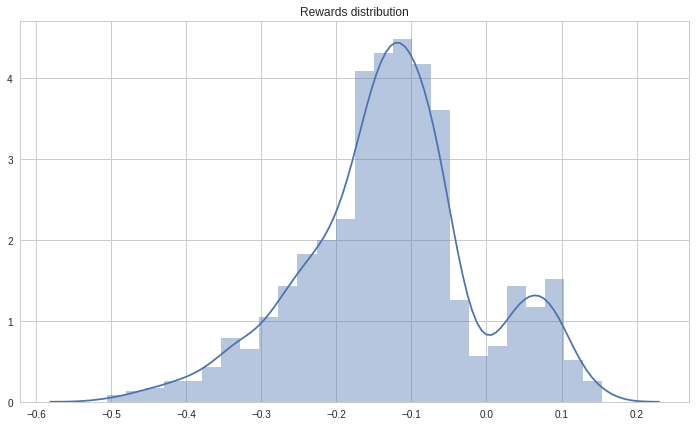

In [7]:
fig, ax = plt.subplots(figsize=(12,7))
ax.set_title("Rewards distribution");
sns.distplot(reward_log, kde=True);
print("Rewards count:",np.array(reward_log).shape)

As seen in the histogram, we are getting most of the reward signals around -0.1. Lets find out how it changes over time.

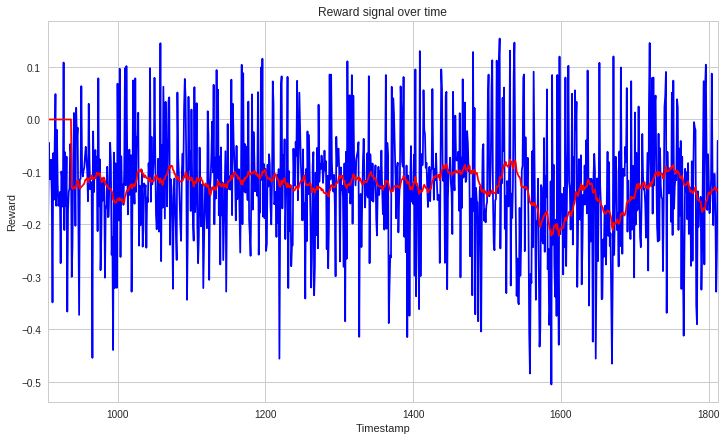

In [8]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

ma_window = 33

fig, ax = plt.subplots(figsize=(12,7))
ax.set_xlabel("Timestamp");
ax.set_title("Reward signal over time");
sns.tsplot(reward_log,timestamps_log,ax=ax,color='b');
sns.tsplot(np.hstack((np.zeros(ma_window-1),moving_average(reward_log, ma_window)))
           ,timestamps_log,ax=ax,color='r');
ax.set_ylabel('Reward');

No real trend here. Lets try to refresh the models trees during the prediction fase and see what happens with the reward signal.

In [9]:
reward_log_2, timestamps_log, score_2 = gen_predictions(0.02,print_info=False)
print("Percent change:", (score_2 - score) / score * 100)

Predicting


Done: 1010.0s
Total reward sum: -115.410732089
Final reward mean: -0.127244467574
Total positive rewards count: 6509, Total negative rewards count: 38529
Final positive reward %: 14.4522403304
{'public_score': 0.022091760196311167}
Percent change: 39.475885922


In [10]:
results_log = add_to_log(reward_log_2, score_2, 0.02, rows_list)
results_log.to_csv('log_4.csv')
results_log

,num_rounds,params_xglin,params_xgtrees,reward_log,score,update_threshold
0,100,"{'booster': 'gblinear', 'objective': 'reg:line...","{'objective': 'reg:linear', 'eta': 0.1, 'max_d...","[-0.201233990548, -0.0442993579161, -0.1051320...",0.015839,NaN
1,100,"{'booster': 'gblinear', 'objective': 'reg:line...","{'objective': 'reg:linear', 'eta': 0.1, 'max_d...","[-0.201233990548, -0.0442993579161, -0.1051320...",0.022092,0.02


Not much of a difference on the rewards log, yet the public score jumped. This is an ~15% increase in the score. What if we do more agressive updates?

In [ ]:
reward_log_3, timestamps_log, score_3 = gen_predictions(0.03,print_info=False)
print("Percent change:", (score_3 - score) / score * 100)

In [ ]:
dict3={}
dict3.update({'score':score_3, 'num_rounds': num_rounds, 'params_xglin': params_xglin, 
              'params_xgtrees': params_xgtrees, 'reward_log':reward_log_3, 
              'update_threshold':0.03}) 
rows_list.append(dict3)
results_log = pd.DataFrame(rows_list) 
results_log.to_csv('log_2.csv')
#results_log.to_clipboard()
results_log

In [ ]:
reward_log_4, timestamps_log, score_4 = gen_predictions(0.02,print_info=False)
print("Percent change:", (score_4 - score) / score * 100)

In [ ]:
def add_to_log(reward_log_i, score_i, update_threshold_i, rows_list_i):
    dicti = {}
    dicti.update({'score':score_i, 'num_rounds': num_rounds, 'params_xglin': params_xglin, 
              'params_xgtrees': params_xgtrees, 'reward_log':reward_log_i, 
              'update_threshold':update_threshold_i})
    rows_list_i.append(dicti)
    results_log = pd.DataFrame(rows_list_i)
    return results_log

#results_log.to_csv('log_2.csv')
results_log = add_to_log(reward_log_4, score_4, 0.02, rows_list)
results_log

In [ ]:
results_log.to_csv('log_2.csv')

In [ ]:
results_log